# Sav iterator

In [11]:
from scipy.io import _idl
import os

path = "E:\\emcubes_110809\\emcubes\\"
xregion = [350,650]
yregion = [275,775]

# path = "E:\\emcubes_140910\\"
# xregion = [250,750]
# yregion = [350,750]   

##############################################
##############################################

filelist = os.listdir(path)

def sav_iterator(file_path):
    fp = open(file_path, "rb") # open file for reading in raw bytes mode
    signature = fp.read(2) # should be b'SR'
    recfmt = fp.read(2) # should be b'\x00\x04' for uncompressed
    while True:
        record_dict = _idl._read_record(fp) # parses dict and advances file pointer accordingly
        yield record_dict
        print(record_dict)
        try:
            print(record_dict['varname'])
        except:
            if record_dict["rectype"] == "END_MARKER":
                break # stop iteration
    fp.close() # close the file object once we're done with it

    return


for record in sav_iterator("E:\\emcubes_110809\\emcubes\\aia_emcube_2011-08-09T07_37_03.57Z.sav"):
    # print(record['rectype'])
    pass


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\emcubes_110809\\emcubes\\'

In [ ]:
import scipy as sp

pathresp = "C://Users//Lucien//Documents//School//Research - Thesis//code//Python//aia_resp_110809.sav"
respinfo = sp.io.readsav(pathresp, python_dict = True, verbose = False)

# print(respinfo["aia_tresp"][0])
print((respinfo["aia_tresp"][0])[2])

# Compare savefig to imsave

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

data = np.random.randn(7, 5)

plt.imsave("imsave_test.png", 
        data, 
        cmap = 'binary_r',  origin='lower',
        pil_kwargs={'lossless':True},
        format = 'webp')

# OR

fig = plt.figure(frameon= False)
fig.set_size_inches(data.shape[1], data.shape[0])
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(data, cmap = 'gray', interpolation='none', origin='lower')

fig.savefig("savefig_test.png", 
        pad_inches=0, 
        bbox_inches='tight',
        dpi = 1,
        )


# Color Test

[-1.   1.   2.5  3.5  4.5  5.5  7. ]
6


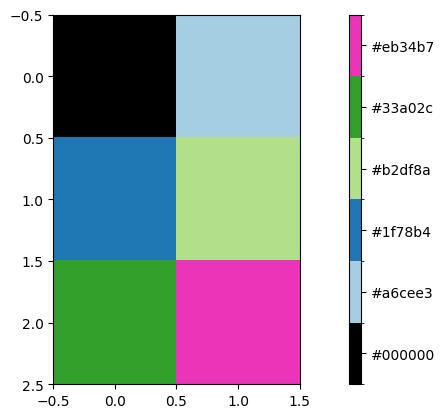

In [1]:
# This code is mostly copied from a matplotlib tutorial. It is used to test the colormap used when plotting the statuscubes.

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
res = np.array([[0, 2], [3, 4], [5, 6]], dtype = int)
u = np.unique(res)
bounds = np.concatenate(([res.min()-1],
                         u[:-1]+np.diff(u)/2.,
                         [res.max()+1]))
 
norm = colors.BoundaryNorm(bounds, len(bounds)-1)
print(bounds)
print(len(bounds)-1)

color_map1 = ['#000000', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#eb34b7']
color_map1 = ['#000000', '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#eb34b7']

color_map = colors.ListedColormap(color_map1) 
 
fig, axes = plt.subplots()
img = axes.imshow(res, cmap = color_map,
                  norm = norm)
divider = make_axes_locatable(axes)
cax = divider.append_axes("right", size ="5 %")
 
color_bar = plt.colorbar(img, cmap = color_map, 
                         norm = norm, cax = cax)
 
color_bar.set_ticks(bounds[:-1]+np.diff(bounds)/2.)
color_bar.ax.set_yticklabels(color_map1)
color_bar.ax.tick_params(labelsize = 10)
 
plt.show()


# Open files

In [ ]:
import os
import numpy as np
import scipy as sp

path = "E:\\2011_08_09.tar\\2011_08_09\\emcubes\\all\\"

filelist = os.listdir(path)
file = filelist[15]
filename = path + file

vars = sp.io.readsav(filename)
data = np.copy(vars.datacube)
# wheredata = np.argwhere(data > 15000)

# print(data[wheredata])
print(vars.datacube)
# print(vars.satmap)

D://emcubes_110809//emcubes_np//aia_emcube_2011-08-09T08_11_53.75Z.npz
[ 0.  2.  3. 10.]
[0. 2. 3. 4.]


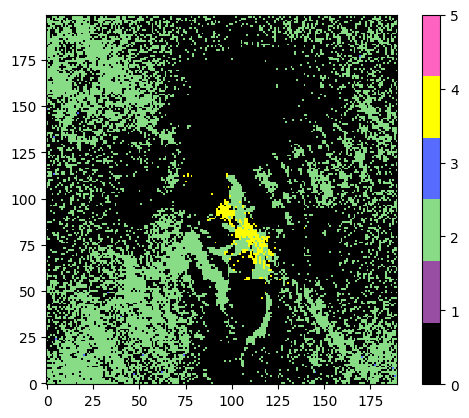

In [26]:
import os
import numpy as np
import scipy as sp

path = "D://emcubes_110809//emcubes_np//"
filelist = os.listdir(path)
file = filelist[35]
filename = path + file
print(filename)

color_list = [
    "#000000",  # black, 0 (converges)
    "#984ea3",  # purple, 1 (unbounded)
    "#88DC85",  # green, 2 (no soln)
    "#576BFF",  # blue, 3 (func did not converge)
    "#ffff00",  # yellow,  10 (negative coeff from simplex) 
    "#FF63C2",  # pink, 11 (nocount; too little data)
    ]

color_list = [
    # "#e41a1c", # red
    # "#000000",
    # "#4daf4a", # green
    # "#61DA5D", # green
    # "#377eb8", # blue
    # "#00B8FF", # blue
    # "#984ea3", # purple
    # "#FF4FC1", # pink
    # "#ff7f00", # orange
    # "#ffff00"    # yellow
    ]

# "#e41a1c", # red
# "#4daf4a", # green
# "#377eb8",
# "#33A0F9", 
# "#984ea3", # purple
# "#FF4FC1", # pink

# color_list = [
#     '#000000',  # black
#     '#a6cee3',  # l-blue
#     '#1f78b4',  # d-blue
#     '#b2df8a',  # l-green
#     '#33a02c',  # d-green
#     '#eb34b7'   # pink
# ]
# color_list = [
#     "#000000", # black
#     "#40B936", # green
#     "#6BCEFF", # blue
#     "#FF4FC1", # pink
#     "#FFDE3B", # yellow
# ]

color_map = colors.ListedColormap(color_list)

xregion = [410,601]
yregion = [410,611]
xstart  = xregion[0]
xend    = xregion[1]-1
ystart  = yregion[0]
yend    = yregion[1]-1

vars = np.load(filename)
statuscube = (vars["statuscube"])[ystart:yend, xstart:xend]

print(np.unique(statuscube))

statuscube[statuscube == 10] = 4
statuscube[statuscube == 11] = 5

print(np.unique(statuscube))

plt.imshow(statuscube, cmap = color_map, vmin = 0, vmax = 5, origin = 'lower', interpolation = 'none')
plt.colorbar()

# Ensure they're the same

In [ ]:


import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt

xregion = [350,651]
yregion = [305,746]

xstart  = xregion[0]
xend    = xregion[1]-1
ystart  = yregion[0]
yend    = yregion[1]-1

# fig = plt.figure(frameon = False)
# gs = fig.add_gridspec(2, 3)#, wspace=0, hspace=0, left = 0, right = 1, top = 1, bottom = 0)
# axs = (gs.subplots(sharex='col', sharey='row')).flatten()

path1 = "E://emcubes_110809//emcubes_mchannel//m335//"
path2 = "E://emcubes_no_335_110809//emcubes_no_335_np//"
filelist1 = os.listdir(path1)
filelist2 = os.listdir(path2)

for i in range(len(filelist1)):
    file1 = path1 + filelist1[i]

    time = file1[-17:-4]

    for i in range(len(filelist2)):
        if time in filelist2[i]:
            file2 = path2 + filelist2[i]
        else:
            pass

    print(file1)
    print(file2)
    vars = sp.io.readsav(file1)
    emcube1 = vars.emcube

    vars2 = np.load(file2)
    emcube2 = vars2["emcube"]

    print(np.allclose(emcube1, emcube2))

# for j in range(6):
#     axs[j].imshow(data[j], interpolation = 'none', origin = 'lower')
#     axs[j].axis('off')

# plt.tight_layout()

# Correct emcubes

In [24]:
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt


path1   = "D://emcubes_110809//emcubes_np//"
path2   = "D://emcubes_110809//emcubes_mchannel//m335//"
filelist1 = os.listdir(path1)
filelist2 = os.listdir(path2)

savdir  = "D://emcubes_110809//emcubes_mchannel//m335_np//"

for i in range(len(filelist1)):
    file1 = path1 + filelist1[i]
    time = file1[-17:-4]

    for i in range(len(filelist2)):
        if time in filelist2[i]:
            file2_nopath = filelist2[i]
            file2 = path2 + filelist2[i]
        else:
            pass

    print("adding satmap from ",file1[-17:], " to ", file2[-17:])

    data = sp.io.readsav(file2, python_dict = True)
    vars_np = np.load(file1)

    data["satmap"] = vars_np["satmap"]

    file3 = savdir + file2_nopath[:-4]
    print(file3)
    np.savez(file3,**data)

adding satmap from  T07_37_03.57Z.npz  to  T07_37_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_37_03.57Z
adding satmap from  T07_38_03.57Z.npz  to  T07_38_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_38_03.57Z
adding satmap from  T07_39_03.57Z.npz  to  T07_39_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_39_03.57Z
adding satmap from  T07_40_03.58Z.npz  to  T07_40_03.58Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_40_03.58Z
adding satmap from  T07_41_03.57Z.npz  to  T07_41_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_41_03.57Z
adding satmap from  T07_42_03.57Z.npz  to  T07_42_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_42_03.57Z
adding satmap from  T07_43_03.57Z.npz  to  T07_43_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_

Exception ignored in: <function ZipFile.__del__ at 0x0000024274315940>
Traceback (most recent call last):
  File "C:\Users\Lucien\AppData\Local\Programs\Python\Python311\Lib\zipfile.py", line 1874, in __del__
    self.close()
  File "C:\Users\Lucien\AppData\Local\Programs\Python\Python311\Lib\zipfile.py", line 1896, in close
    self._fpclose(fp)
  File "C:\Users\Lucien\AppData\Local\Programs\Python\Python311\Lib\zipfile.py", line 1996, in _fpclose
    fp.close()
PermissionError: [Errno 13] Permission denied


D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_46_03.57Z
adding satmap from  T07_47_03.57Z.npz  to  T07_47_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_47_03.57Z
adding satmap from  T07_48_03.57Z.npz  to  T07_48_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_48_03.57Z
adding satmap from  T07_49_03.57Z.npz  to  T07_49_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_49_03.57Z
adding satmap from  T07_50_03.57Z.npz  to  T07_50_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_50_03.57Z
adding satmap from  T07_51_03.57Z.npz  to  T07_51_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_51_03.57Z
adding satmap from  T07_52_03.57Z.npz  to  T07_52_03.57Z.sav
D://emcubes_110809//emcubes_mchannel//m335_np//aia_m335_emcube_2011-08-09T07_52_03.57Z
adding satmap from  T07_5